In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [68]:
df=pd.read_csv("data.csv")
df.head(5)

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,19-03-2016,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,19-03-2016,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,19-03-2016,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,19-03-2016,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,19-03-2016,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [66]:
df.columns

Index(['report_date', 'location', 'location_type', 'data_field',
       'data_field_code', 'time_period', 'time_period_type', 'value', 'unit'],
      dtype='object')

In [69]:
 type(df.report_date[0])

str

<h4>Data-type of 'Report_date' is 'str' , so we will convert its into 'Timestamp' ,so that we can perform operations on this.</h4>

In [70]:
df['report_date']=pd.to_datetime(df.report_date,dayfirst=True, errors='coerce')

type(df.report_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [57]:
df.shape

(107619, 9)

In [71]:
df.head(5)

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


<h1></h1>

<h1>Q.1 show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration.</h1>


In [185]:
new_df=df[(df.data_field_code=='AR0005') &(df.location=='Argentina-Catamarca')].reset_index()
new_df.head(10)

,index,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,16,2016-03-19,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,14,cases
1,160,2016-03-26,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,15,cases
2,304,2016-04-02,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,15,cases
3,448,2016-04-09,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,15,cases
4,592,2016-04-16,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,15,cases
5,736,2016-04-29,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,15,cases
6,880,2016-05-07,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,16,cases
7,1024,2016-05-14,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,15,cases
8,1168,2016-05-22,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,16,cases
9,1312,2016-05-30,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,15,cases


In [186]:
type(new_df.value[0])

str

<h4> Data-type of 'value' is 'str' ,so we will convert it into 'int' , so that we can perform 'sum' on this data </h4>

In [187]:
new_df['value']=new_df['value'].astype(int)
type(new_df.value[0])

numpy.int32

In [76]:
dur_wise_data=new_df['value'].groupby(new_df['report_date']).sum()
dur_wise_data

report_date
2016-03-19    14
2016-03-26    15
2016-04-02    15
2016-04-09    15
2016-04-16    15
2016-04-29    15
2016-05-07    16
2016-05-14    15
2016-05-22    16
2016-05-30    15
2016-06-06    15
2016-06-13    15
2016-06-18    15
2016-06-26    16
Name: value, dtype: int32

In [193]:
values=list(dur_wise_data)
values

[14, 15, 15, 15, 15, 15, 16, 15, 16, 15, 15, 15, 15, 16]

In [194]:
dates=list(dur_wise_data.index)
dates

[Timestamp('2016-03-19 00:00:00'),
 Timestamp('2016-03-26 00:00:00'),
 Timestamp('2016-04-02 00:00:00'),
 Timestamp('2016-04-09 00:00:00'),
 Timestamp('2016-04-16 00:00:00'),
 Timestamp('2016-04-29 00:00:00'),
 Timestamp('2016-05-07 00:00:00'),
 Timestamp('2016-05-14 00:00:00'),
 Timestamp('2016-05-22 00:00:00'),
 Timestamp('2016-05-30 00:00:00'),
 Timestamp('2016-06-06 00:00:00'),
 Timestamp('2016-06-13 00:00:00'),
 Timestamp('2016-06-18 00:00:00'),
 Timestamp('2016-06-26 00:00:00')]

<h1> Now Plotting the Line Graph </h1>

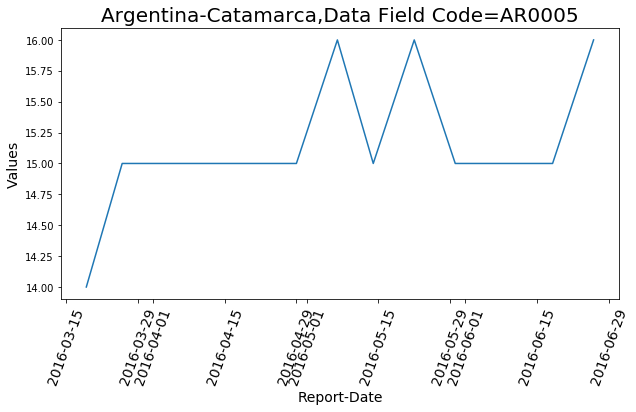

In [181]:
plt.figure(figsize=(10,5))
plt.title("Argentina-Catamarca,Data Field Code=AR0005",fontsize=20)
plt.plot(dates,values)
plt.xlabel("Report-Date",fontsize=14)
plt.xticks(rotation=70,fontsize=14)
plt.ylabel("Values",fontsize=14)
plt.show()


</h1>

# Q. 2. Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference.

In [81]:
caba_data=df[(df.location=='Argentina-CABA')&(df.unit=='cases')].reset_index()
caba_data.head(5)

,index,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,6,2016-03-19,Argentina-CABA,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,7,2016-03-19,Argentina-CABA,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,8,2016-03-19,Argentina-CABA,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,9,cases
3,9,2016-03-19,Argentina-CABA,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,0,cases
4,10,2016-03-19,Argentina-CABA,province,cumulative_cases_under_study,AR0005,NaN,NaN,68,cases


In [82]:
caba_data.shape

(84, 10)

In [84]:
cata_data=df[(df.location=='Argentina-Catamarca')&(df.unit=='cases')].reset_index()
cata_data.head(5)

,index,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,12,2016-03-19,Argentina-Catamarca,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,13,2016-03-19,Argentina-Catamarca,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,14,2016-03-19,Argentina-Catamarca,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,0,cases
3,15,2016-03-19,Argentina-Catamarca,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,0,cases
4,16,2016-03-19,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,14,cases


In [86]:
cata_data.shape

(84, 10)

In [88]:
type(caba_data.value[0])

str

In [90]:
caba_data['value']=caba_data['value'].astype(int)
cata_data['value']=cata_data['value'].astype(int)


In [91]:
type(caba_data.value[0])

numpy.int32

In [93]:
caba_dur_wise_data=caba_data['value'].groupby(caba_data['report_date']).sum()
caba_dur_wise_data

report_date
2016-03-19     78
2016-03-26     92
2016-04-02     94
2016-04-09     97
2016-04-16     98
2016-04-29    101
2016-05-07    255
2016-05-14    126
2016-05-22    260
2016-05-30    132
2016-06-06    134
2016-06-13    136
2016-06-18    136
2016-06-26    160
Name: value, dtype: int32

In [94]:
caba_values=caba_dur_wise_data.tolist()
caba_values

[78, 92, 94, 97, 98, 101, 255, 126, 260, 132, 134, 136, 136, 160]

In [96]:
caba_dates=caba_dur_wise_data.index.tolist()
caba_dates

[Timestamp('2016-03-19 00:00:00'),
 Timestamp('2016-03-26 00:00:00'),
 Timestamp('2016-04-02 00:00:00'),
 Timestamp('2016-04-09 00:00:00'),
 Timestamp('2016-04-16 00:00:00'),
 Timestamp('2016-04-29 00:00:00'),
 Timestamp('2016-05-07 00:00:00'),
 Timestamp('2016-05-14 00:00:00'),
 Timestamp('2016-05-22 00:00:00'),
 Timestamp('2016-05-30 00:00:00'),
 Timestamp('2016-06-06 00:00:00'),
 Timestamp('2016-06-13 00:00:00'),
 Timestamp('2016-06-18 00:00:00'),
 Timestamp('2016-06-26 00:00:00')]

In [97]:
cata_dur_wise_data=cata_data['value'].groupby(cata_data['report_date']).sum()
cata_dur_wise_data

report_date
2016-03-19    14
2016-03-26    15
2016-04-02    15
2016-04-09    15
2016-04-16    15
2016-04-29    15
2016-05-07    16
2016-05-14    15
2016-05-22    16
2016-05-30    15
2016-06-06    15
2016-06-13    15
2016-06-18    15
2016-06-26    16
Name: value, dtype: int32

In [144]:
cata_values=cata_dur_wise_data.tolist()
cata_values

[14, 15, 15, 15, 15, 15, 16, 15, 16, 15, 15, 15, 15, 16]

In [189]:
cata_dates=cata_dur_wise_data.index.tolist()
cata_dates

[Timestamp('2016-03-19 00:00:00'),
 Timestamp('2016-03-26 00:00:00'),
 Timestamp('2016-04-02 00:00:00'),
 Timestamp('2016-04-09 00:00:00'),
 Timestamp('2016-04-16 00:00:00'),
 Timestamp('2016-04-29 00:00:00'),
 Timestamp('2016-05-07 00:00:00'),
 Timestamp('2016-05-14 00:00:00'),
 Timestamp('2016-05-22 00:00:00'),
 Timestamp('2016-05-30 00:00:00'),
 Timestamp('2016-06-06 00:00:00'),
 Timestamp('2016-06-13 00:00:00'),
 Timestamp('2016-06-18 00:00:00'),
 Timestamp('2016-06-26 00:00:00')]

<h1> Now Plotting the Bar Graph </h1>

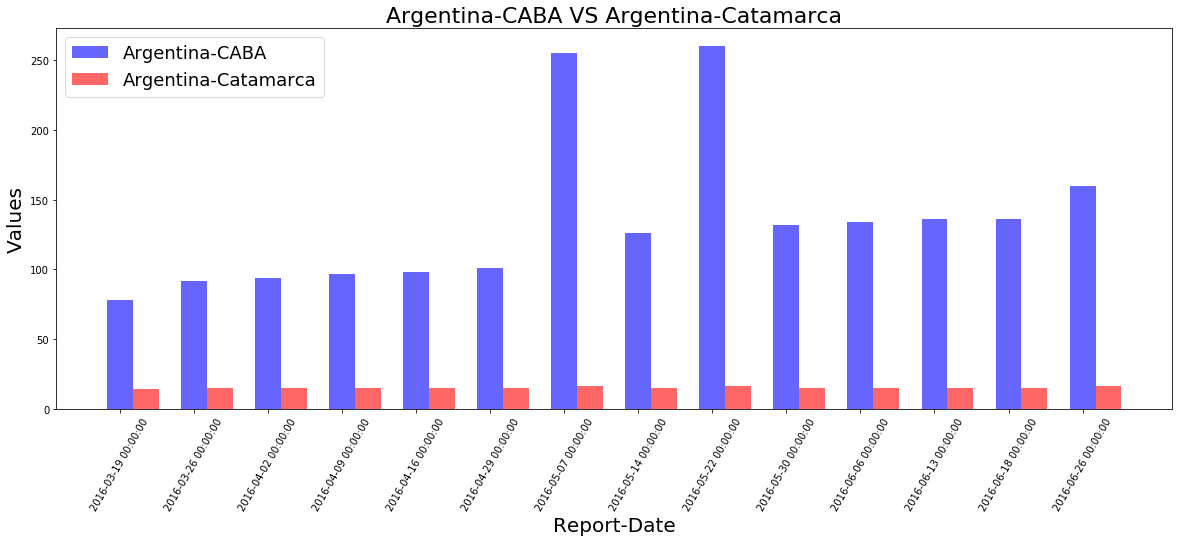

In [148]:
import numpy as np

fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111)
n_groups = 14
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
ax1.bar(index,caba_values, color='blue', label='Argentina-CABA',width=bar_width,alpha=0.6)
ax1.bar(index+bar_width,cata_values, color='red', label='Argentina-Catamarca',width=bar_width,alpha=0.6)
plt.title('Argentina-CABA VS Argentina-Catamarca',fontsize=22)
plt.legend(loc='upper left',fontsize=18)
plt.xlabel("Report-Date",fontsize=20)
plt.xticks(index, cata_dates,rotation=60)
plt.ylabel("Values",fontsize=20)
plt.show()


<h1></h1>

<h1> Q. 3. Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'</h1>

In [149]:
bue_data=df[df.location=='Argentina-Buenos_Aires'].reset_index()
bue_data.head(5)

,index,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [150]:
bue_data.shape

(84, 10)

In [154]:
bue_data['value']=bue_data['value'].astype(int)
type(bue_data.value[0])

numpy.int32

In [155]:
bue_field_data=bue_data['value'].groupby(bue_data['data_field']).sum()
bue_field_data

data_field
cumulative_cases_discarded              251
cumulative_cases_under_study           2981
cumulative_confirmed_imported_cases      32
cumulative_confirmed_local_cases          0
cumulative_probable_imported_cases       15
cumulative_probable_local_cases           0
Name: value, dtype: int32

In [163]:
caba_field_data=caba_data['value'].groupby(caba_data['data_field']).sum()
caba_field_data

data_field
cumulative_cases_discarded               27
cumulative_cases_under_study           1748
cumulative_confirmed_imported_cases     124
cumulative_confirmed_local_cases          0
cumulative_probable_imported_cases        0
cumulative_probable_local_cases           0
Name: value, dtype: int32

In [158]:
cata_field_data=cata_data['value'].groupby(cata_data['data_field']).sum()
cata_field_data

data_field
cumulative_cases_discarded               0
cumulative_cases_under_study           212
cumulative_confirmed_imported_cases      0
cumulative_confirmed_local_cases         0
cumulative_probable_imported_cases       0
cumulative_probable_local_cases          0
Name: value, dtype: int32

In [190]:
data_field_values=list(cata_field_data.index)
data_field_values

['cumulative_cases_discarded',
 'cumulative_cases_under_study',
 'cumulative_confirmed_imported_cases',
 'cumulative_confirmed_local_cases',
 'cumulative_probable_imported_cases',
 'cumulative_probable_local_cases']

<h1> Now Plotting the Scatter Chart </h1>

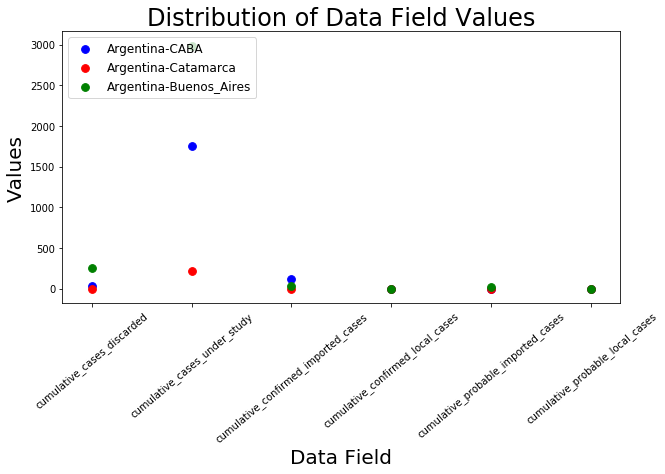

In [179]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax1.scatter(data_field_values,list(caba_field_data), s=60, c='b', marker="o", label='Argentina-CABA')
ax1.scatter(data_field_values,list(cata_field_data), s=60, c='r', marker="o", label='Argentina-Catamarca')
ax1.scatter(data_field_values,list(bue_field_data), s=60, c='g', marker="o", label='Argentina-Buenos_Aires')
plt.legend(loc='upper left',fontsize=12)
plt.title("Distribution of Data Field Values",fontsize=24)
plt.xlabel("Data Field",fontsize=20)
plt.ylabel("Values",fontsize=20)
plt.xticks(rotation=40)
plt.show()